# Importes

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd "/content/drive/MyDrive/00 PhD Computação UFPE/2021.2/01 DISCIPLINAS/04 IN1102 - Aprendizagem de Máquina /IN1102 - Aprendizagem de Máquina - compartilhada/Projeto AM 2021.2 - compartilhado com Francisco/Colab"

/content/drive/MyDrive/00 PhD Computação UFPE/2021.2/01 DISCIPLINAS/04 IN1102 - Aprendizagem de Máquina /IN1102 - Aprendizagem de Máquina - compartilhada/Projeto AM 2021.2 - compartilhado com Francisco/Colab


In [3]:
from itertools import chain
import pickle

import numpy as np
import pandas as pd

import src.dataset as dataset

In [4]:
from src.utils import get_fmeasure_modificada
from src.utils import get_hard_patitions_clustering

def obter_classes():
    return dataset.CLASSES_TEST

def calc_partition_coefficient(pertinencia):
    n = pertinencia.shape[0]
    pertinencia = np.power(pertinencia, 2)
    return pertinencia.sum(axis = 1).sum()/n

def calc_modified_partition_coefficient(pertinencia):
    c = pertinencia.shape[1]
    vpc = calc_partition_coefficient(pertinencia)
    return 1 - (c/(c-1))*(1-vpc)

def calc_partition_entropy(pertinencia):
    n = pertinencia.shape[0]
    pertinencia = np.log10(pertinencia) * pertinencia
    return -pertinencia.sum(axis = 1).sum()/n

def importar_resultado(file_name):
    with open(file_name, "rb") as f:
        return pickle.load(f)

In [5]:
melhor_rgb = importar_resultado("data/melhor_resultado_rgb.pickle")
melhor_shape = importar_resultado("data/melhor_resultado_shape.pickle")
melhor_shape_rgb = importar_resultado("data/melhor_resultado_rgb_shape.pickle")

# Melhores resultados:

In [6]:
print("Melhor custo RGB: ", melhor_rgb["custo"])
print("Melhor custo SHAPE: ", melhor_shape["custo"])
print("Melhor custo SHAPE_RGB: ", melhor_shape_rgb["custo"])

Melhor custo RGB:  -869.270749940405
Melhor custo SHAPE:  -1216.3679042739454
Melhor custo SHAPE_RGB:  -1216.3679042739454


# Modified partition coefficient


In [7]:
print("RGB: ", calc_modified_partition_coefficient(melhor_rgb["pertinencia"]))
print("SHAPE: ", calc_modified_partition_coefficient(melhor_shape["pertinencia"]))
print("SHAPE_RGB: ",  calc_modified_partition_coefficient(melhor_shape_rgb["pertinencia"]))

RGB:  0.0015854730583358956
SHAPE:  -2.220446049250313e-16
SHAPE_RGB:  -2.220446049250313e-16


# Entropy


In [8]:
print("RGB: ", calc_partition_entropy(melhor_rgb["pertinencia"]))
print("SHAPE: ", calc_partition_entropy(melhor_shape["pertinencia"]))
print("SHAPE_RGB: ",  calc_partition_entropy(melhor_shape_rgb["pertinencia"]))

RGB:  0.8430291302366082
SHAPE:  0.8450980400142569
SHAPE_RGB:  0.8450980400142569


# Partições Crisp

# Adjusted Rand Index


In [9]:
classes = obter_classes()

In [10]:
from sklearn.metrics import adjusted_rand_score, f1_score, accuracy_score

_, rgb_classes = get_hard_patitions_clustering(melhor_rgb["pertinencia"])
_, shape_classes = get_hard_patitions_clustering(melhor_shape["pertinencia"])
_, shape_rgb_classes = get_hard_patitions_clustering(melhor_shape_rgb["pertinencia"])

print('RGB: ', adjusted_rand_score(rgb_classes, classes))
print('SHAPE: ', adjusted_rand_score(shape_classes, classes))
print('SHAPE_RGB: ', adjusted_rand_score(shape_rgb_classes, classes))

RGB:  0.18993832946460326
SHAPE:  0.000713738598899327
SHAPE_RGB:  0.000713738598899327


# F-measure adaptada para clusterização


In [11]:
print('RGB: ', get_fmeasure_modificada(classes, melhor_rgb["pertinencia"]))
print('SHAPE: ', get_fmeasure_modificada(classes, melhor_shape["pertinencia"]))
print('SHAPE_RGB: ', get_fmeasure_modificada(classes, melhor_shape_rgb["pertinencia"]))

RGB:  0.3972898857486867
SHAPE:  0.2485602823704254
SHAPE_RGB:  0.2485602823704254


# Comparação dois a dois

In [12]:
grupos2a2 = [
          ("RGB x SHAPE", melhor_rgb, melhor_shape),
          ("SHAPE X RGB", melhor_shape, melhor_rgb),
          ("RGB X SHAPE_RGB", melhor_rgb, melhor_shape_rgb),
          ("SHAPE_RGB X RGB", melhor_shape_rgb, melhor_rgb),
          ("SHAPE X SHAPE_RGB", melhor_shape, melhor_shape_rgb),
          ("SHAPE_RGB X SHAPE", melhor_shape_rgb, melhor_shape),
]

## Índice rand corrigido

In [13]:
for name, dt1, dt2 in grupos2a2:
  _,y1 = get_hard_patitions_clustering(dt1["pertinencia"])
  _,y2 = get_hard_patitions_clustering(dt2["pertinencia"])

  print(f'{name}: ', adjusted_rand_score(y1, y2))

RGB x SHAPE:  -0.00029330706766814477
SHAPE X RGB:  -0.00029330706766814477
RGB X SHAPE_RGB:  -0.00029330706766814477
SHAPE_RGB X RGB:  -0.00029330706766814477
SHAPE X SHAPE_RGB:  1.0
SHAPE_RGB X SHAPE:  1.0


# Medida-F

In [14]:
for name, dt1, dt2 in grupos2a2:
  _,y1 = get_hard_patitions_clustering(dt1["pertinencia"])
  _,y2 = get_hard_patitions_clustering(dt2["pertinencia"])

  print(f'{name}: ', f1_score(y1, y2, average="weighted"))

RGB x SHAPE:  0.33553459119496853
SHAPE X RGB:  0.631132075471698
RGB X SHAPE_RGB:  0.33553459119496853
SHAPE_RGB X RGB:  0.631132075471698
SHAPE X SHAPE_RGB:  1.0
SHAPE_RGB X SHAPE:  1.0


# Imprimindo resultados

## Protótipos

In [15]:
def imprimir_prototipos(protos):
  for i, p in enumerate(protos, start=1):
    print(i, ":", p)
  
print("RGB: ")
imprimir_prototipos(melhor_rgb["prototipos"])

print("SHAPE: ")
imprimir_prototipos(melhor_shape["prototipos"])

print("SHAPE_RGB: ")
imprimir_prototipos(melhor_shape_rgb["prototipos"])

RGB: 
1 : [ 23.851852    21.666666    30.666666    24.444445   -11.666667
  21.777779   -11.888889    31.333334     0.33512673  -2.0561552 ]
2 : [ 23.851852    21.666666    30.666666    24.444445   -11.666667
  21.777779   -11.888889    31.333334     0.33512673  -2.0561552 ]
3 : [ 23.851852    21.666666    30.666666    24.444445   -11.666667
  21.777779   -11.888889    31.333334     0.33512673  -2.0561552 ]
4 : [ 20.185184   18.11111    25.333334   18.88889   -10.444445   18.444445
 -10.222222   26.777779    0.3961213  -2.050388 ]
5 : [ 20.185184   18.11111    25.333334   18.88889   -10.444445   18.444445
 -10.222222   26.777779    0.3961213  -2.050388 ]
6 : [ 20.185184   18.11111    25.333334   18.88889   -10.444445   18.444445
 -10.222222   26.777779    0.3961213  -2.050388 ]
7 : [ 20.185184   18.11111    25.333334   18.88889   -10.444445   18.444445
 -10.222222   26.777779    0.3961213  -2.050388 ]
SHAPE: 
1 : [0.        0.        1.2777761 0.8333331 1.4444441 0.9831922]
2 : [0.    

## Relevância das variáveis
  

In [16]:
def imprimir_relevancias(relevancias):
  for i, r in enumerate(relevancias, start=1):
    print(i, ":", r)

In [17]:
print("RGB: ")
imprimir_relevancias(melhor_rgb["relevancia"])

print("SHAPE: ")
imprimir_relevancias(melhor_shape["relevancia"])

print("SHAPE_RGB: ")
imprimir_relevancias(melhor_shape_rgb["relevancia"])

RGB: 
1 : [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
2 : [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
3 : [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
4 : [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
5 : [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
6 : [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
7 : [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
SHAPE: 
1 : [3.13466981e-05 9.99968653e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
2 : [3.13466981e-05 9.99968653e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
3 : [3.13466981e-05 9.99968653e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
4 : [3.13466981e-05 9.99968653e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
5 : [3.13466981e-05 9.99968653e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
6 : [3.13466981e-05 9.99968653e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
7 : [3.13466981e-05 9.99968653e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
SHAPE_RGB: 
1 : [3.13466981e-05 9.99968653e-01 0.000000

## Matriz de confusão crisp x à priori

### RGB

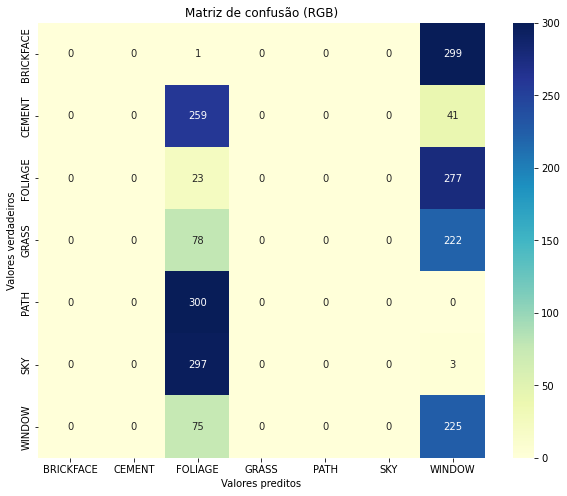

In [18]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_matriz(resultado, name):
  class_names = dataset.le_test.classes_

  y_pred =  get_hard_patitions_clustering(resultado["pertinencia"])[1]

  cm = confusion_matrix(classes, y_pred)
  cm_df = pd.DataFrame(cm,
                      index = class_names, 
                      columns = class_names)

  plt.figure(figsize=(10,8))
  sns.heatmap(cm_df, annot=True, fmt="d", cmap="YlGnBu")
  plt.title(f'Matriz de confusão ({name})')
  plt.ylabel('Valores verdadeiros')
  plt.xlabel('Valores preditos')
  plt.show()


plot_matriz(melhor_rgb, "RGB")


### SHAPE

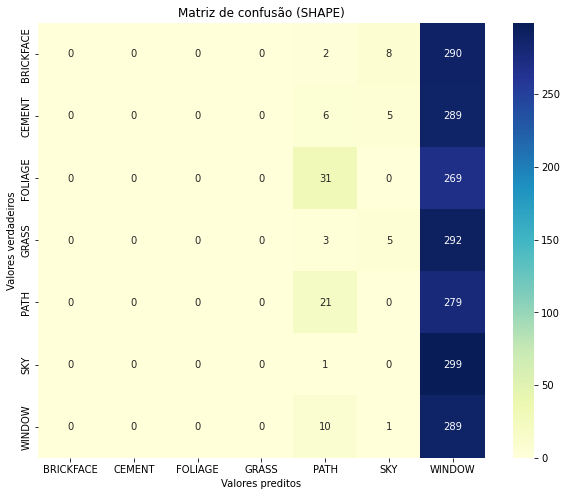

In [19]:
plot_matriz(melhor_shape, "SHAPE")

### SHAPE_RGB

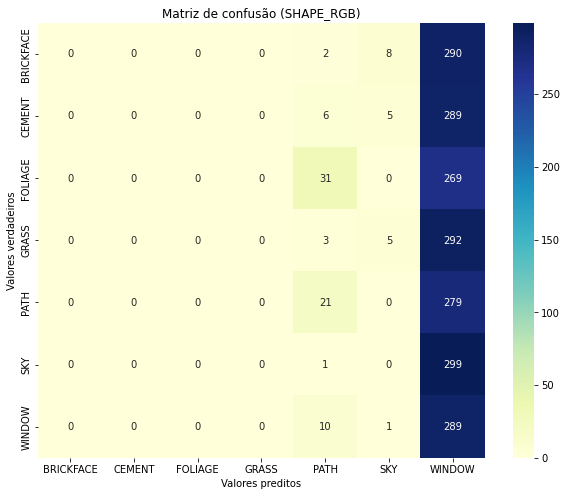

In [20]:
plot_matriz(melhor_shape_rgb, "SHAPE_RGB")

## Matriz de confusão crisp x crisp

### RGB x SHAPE

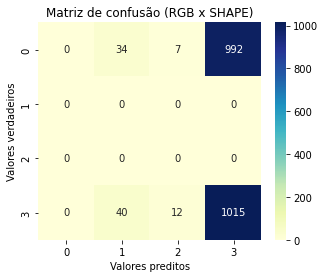

In [21]:
def plot_matriz_crisp_x_crisp(dt1, dt2, name):
  y_true =  get_hard_patitions_clustering(dt1["pertinencia"])[1]
  y_pred =  get_hard_patitions_clustering(dt2["pertinencia"])[1]
  

  cm = confusion_matrix(y_true, y_pred)
  cm_df = pd.DataFrame(cm)

  plt.figure(figsize=(5,4))
  sns.heatmap(cm_df, annot=True, fmt="d", cmap="YlGnBu")
  plt.title(f'Matriz de confusão ({name})')
  plt.ylabel('Valores verdadeiros')
  plt.xlabel('Valores preditos')
  plt.show()

plot_matriz_crisp_x_crisp(melhor_rgb, melhor_shape, "RGB x SHAPE")

### SHAPE x RGB

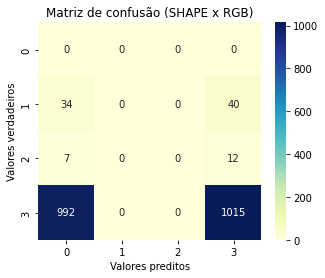

In [22]:
plot_matriz_crisp_x_crisp(melhor_shape, melhor_rgb, "SHAPE x RGB")

### RGB x RGB_SHAPE

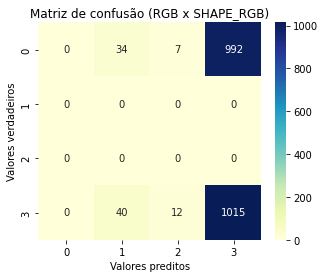

In [23]:
plot_matriz_crisp_x_crisp(melhor_rgb, melhor_shape_rgb, "RGB x SHAPE_RGB")

### SHAPE_RGB x RGB

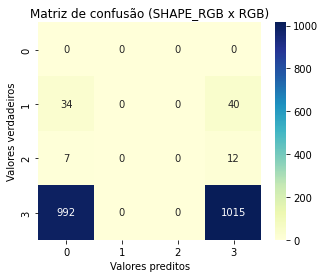

In [24]:
plot_matriz_crisp_x_crisp(melhor_shape_rgb, melhor_rgb, "SHAPE_RGB x RGB")

### SHAPE X SHAPE_RGB

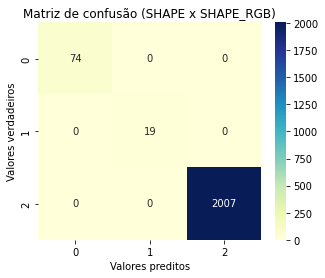

In [25]:
plot_matriz_crisp_x_crisp(melhor_shape, melhor_shape_rgb, "SHAPE x SHAPE_RGB")

### SHAPE_RGB x SHAPE

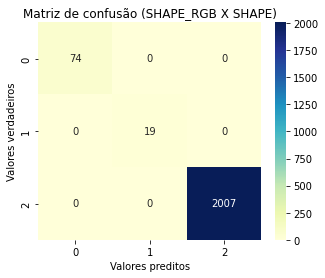

In [26]:
plot_matriz_crisp_x_crisp(melhor_shape_rgb, melhor_shape, "SHAPE_RGB X SHAPE")